In [1]:
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Avg Earnings per Week.csv", skiprows=[1])

In [3]:
df.shape

(160, 10)

In [4]:
df.head()

,Unnamed: 0,All manual employee grades,Skilled operatives,Apprentices,Unskilled and semi-skilled - adults,Unskilled and semi-skilled - juveniles,Clerical employees - female,Clerical employees - male,Foremen and supervisors,All employees (clerical and operatives)
0,1969Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN,NaN
1,1969Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN,NaN
2,1969Q3,26.0,30.77,12.63,24.71,11.44,14.01,22.33,35.4,25.56
3,1969Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN,NaN
4,1970Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns.values

array(['Unnamed: 0', 'All manual employee grades', 'Skilled operatives',
       'Apprentices', 'Unskilled and semi-skilled - adults',
       'Unskilled and semi-skilled - juveniles',
       'Clerical employees - female', 'Clerical employees - male',
       'Foremen and supervisors',
       'All employees (clerical and operatives)'], dtype=object)

In [6]:
df=df.rename(columns={'Unnamed: 0': 'Year_Quarter', 'All manual employee grades':'Manual_employee_grades',
            'Skilled operatives':'Skilled_operatives','Unskilled and semi-skilled - adults':'Semi_skilled_adults',
            'Unskilled and semi-skilled - juveniles':'Semi_skilled_juveniles',
            'Clerical employees - female':'Clerical_employees_female',
            'Clerical employees - male':'Clerical_employees_male',
            'Foremen and supervisors':'Foremen_and_supervisors',
            'All employees (clerical and operatives)':'Clerical_and_Operatives'})

In [7]:
df.tail()

,Year_Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
155,2007Q4,878.93,946.67,529.94,838.42,538.07,545.94,724.50,"1,094",842.29
156,2008Q1,861.20,920.77,495.34,829.71,518.46,540.39,724.98,"1,079.12",829.22
157,2008Q2,842.95,912.50,490.82,803.92,479.55,544.70,719.01,"1,086.62",813.88
158,2008Q3,848.49,919.12,531.14,799.90,474.64,543.50,762.07,"1,102.07",820.59
159,2008Q4,855.54,913.07,535.35,796.63,425.78,540.13,760.96,"1,083.12",822.31


In [8]:
df.describe()

,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives
count,121.000000,160.000000,121.000000,160.000000,121.000000,121.000000,121.000000,121.000000
mean,395.917107,363.561125,234.635537,303.834062,230.160826,249.746198,343.233306,385.084711
std,245.936523,282.171432,144.051430,237.058516,150.486269,152.944761,205.415366,237.377727
min,26.000000,25.240000,12.600000,21.340000,11.440000,14.010000,22.330000,25.560000
25%,232.650000,116.092500,141.870000,98.512500,112.570000,151.120000,208.200000,227.590000
50%,335.740000,274.440000,208.430000,237.295000,200.540000,214.510000,291.610000,326.790000
75%,607.470000,551.450000,358.710000,406.812500,368.000000,355.670000,495.610000,588.600000
max,878.930000,946.670000,535.350000,838.420000,563.840000,545.940000,762.070000,842.290000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Quarter               160 non-null    object 
 1   Manual_employee_grades     121 non-null    float64
 2   Skilled_operatives         160 non-null    float64
 3   Apprentices                121 non-null    float64
 4   Semi_skilled_adults        160 non-null    float64
 5   Semi_skilled_juveniles     121 non-null    float64
 6   Clerical_employees_female  121 non-null    float64
 7   Clerical_employees_male    121 non-null    float64
 8   Foremen_and_supervisors    121 non-null    object 
 9   Clerical_and_Operatives    121 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.6+ KB


In [10]:
df['Year and Quarter'] =df['Year_Quarter'].str.replace(r'(\w{4})',r'\1-',regex=True).str.strip('\-')

In [11]:
df.head()

,Year_Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives,Year and Quarter
0,1969Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN,NaN,1969-Q1
1,1969Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN,NaN,1969-Q2
2,1969Q3,26.0,30.77,12.63,24.71,11.44,14.01,22.33,35.4,25.56,1969-Q3
3,1969Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN,NaN,1969-Q4
4,1970Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN,NaN,1970-Q1


In [12]:
df[['Year','Quarter']] = df['Year and Quarter'].str.split('-',expand=True)

In [13]:
df.head()

,Year_Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Semi_skilled_juveniles,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives,Year and Quarter,Year,Quarter
0,1969Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN,NaN,1969-Q1,1969,Q1
1,1969Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN,NaN,1969-Q2,1969,Q2
2,1969Q3,26.0,30.77,12.63,24.71,11.44,14.01,22.33,35.4,25.56,1969-Q3,1969,Q3
3,1969Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN,NaN,1969-Q4,1969,Q4
4,1970Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN,NaN,1970-Q1,1970,Q1


In [14]:
df = df.drop(['Year_Quarter','Year and Quarter'], axis=1)

In [15]:
df.shape

(160, 11)

In [16]:
df=df[["Year","Quarter","Manual_employee_grades","Skilled_operatives","Apprentices","Semi_skilled_adults","Clerical_employees_female",
       "Clerical_employees_male","Foremen_and_supervisors","Clerical_and_Operatives"]]

In [17]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,1969,Q1,NaN,25.24,NaN,21.34,NaN,NaN,NaN,NaN
1,1969,Q2,NaN,27.59,NaN,23.41,NaN,NaN,NaN,NaN
2,1969,Q3,26.0,30.77,12.63,24.71,14.01,22.33,35.4,25.56
3,1969,Q4,NaN,29.48,NaN,23.20,NaN,NaN,NaN,NaN
4,1970,Q1,NaN,29.97,NaN,24.19,NaN,NaN,NaN,NaN


In [18]:
df.isnull().sum()

Year                          0
Quarter                       0
Manual_employee_grades       39
Skilled_operatives            0
Apprentices                  39
Semi_skilled_adults           0
Clerical_employees_female    39
Clerical_employees_male      39
Foremen_and_supervisors      39
Clerical_and_Operatives      39
dtype: int64

In [19]:
df = df.fillna(method='ffill')

In [20]:
df = df.fillna(method='backfill')

In [21]:
df.isnull().sum()

Year                         0
Quarter                      0
Manual_employee_grades       0
Skilled_operatives           0
Apprentices                  0
Semi_skilled_adults          0
Clerical_employees_female    0
Clerical_employees_male      0
Foremen_and_supervisors      0
Clerical_and_Operatives      0
dtype: int64

In [22]:
df.describe()

,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Clerical_and_Operatives
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,321.921063,363.561125,190.246563,303.834062,202.449000,279.386812,313.306938
std,252.739630,282.171432,149.087015,237.058516,158.338201,213.151840,244.338197
min,26.000000,25.240000,12.600000,21.340000,14.010000,22.330000,25.560000
25%,101.342500,116.092500,58.535000,98.512500,62.467500,87.447500,99.640000
50%,249.575000,274.440000,152.685000,237.295000,160.850000,222.990000,243.910000
75%,462.880000,551.450000,279.790000,406.812500,299.955000,425.395000,452.277500
max,878.930000,946.670000,535.350000,838.420000,545.940000,762.070000,842.290000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       160 non-null    object 
 1   Quarter                    160 non-null    object 
 2   Manual_employee_grades     160 non-null    float64
 3   Skilled_operatives         160 non-null    float64
 4   Apprentices                160 non-null    float64
 5   Semi_skilled_adults        160 non-null    float64
 6   Clerical_employees_female  160 non-null    float64
 7   Clerical_employees_male    160 non-null    float64
 8   Foremen_and_supervisors    160 non-null    object 
 9   Clerical_and_Operatives    160 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.6+ KB


In [24]:
df['Foremen_and_supervisors']=df['Foremen_and_supervisors'].str.replace(',','')

In [25]:
df["Year"]=df["Year"].astype('int')

In [26]:
df["Quarter"]=df["Quarter"].astype('category')

In [27]:
df["Foremen_and_supervisors"]=df["Foremen_and_supervisors"].astype('float64')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       160 non-null    int32   
 1   Quarter                    160 non-null    category
 2   Manual_employee_grades     160 non-null    float64 
 3   Skilled_operatives         160 non-null    float64 
 4   Apprentices                160 non-null    float64 
 5   Semi_skilled_adults        160 non-null    float64 
 6   Clerical_employees_female  160 non-null    float64 
 7   Clerical_employees_male    160 non-null    float64 
 8   Foremen_and_supervisors    160 non-null    float64 
 9   Clerical_and_Operatives    160 non-null    float64 
dtypes: category(1), float64(8), int32(1)
memory usage: 11.1 KB


<AxesSubplot:xlabel='Year'>

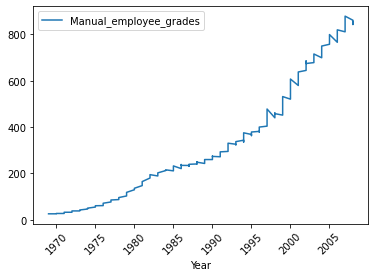

In [29]:
df.plot(x='Year', y='Manual_employee_grades', rot=45)

In [30]:
df_corr=df.drop(["Quarter"],axis=1)
corr = df_corr.corr()
corr

,Year,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
Year,1.000000,0.961482,0.964398,0.964391,0.957334,0.967050,0.969354,0.966753,0.962872
Manual_employee_grades,0.961482,1.000000,0.998882,0.997695,0.999101,0.998699,0.997132,0.999063,0.999973
Skilled_operatives,0.964398,0.998882,1.000000,0.996499,0.996776,0.997272,0.996317,0.998642,0.999067
Apprentices,0.964391,0.997695,0.996499,1.000000,0.996069,0.996689,0.995678,0.997057,0.997683
Semi_skilled_adults,0.957334,0.999101,0.996776,0.996069,1.000000,0.997273,0.994944,0.997173,0.998943
Clerical_employees_female,0.967050,0.998699,0.997272,0.996689,0.997273,1.000000,0.998464,0.999029,0.998816
Clerical_employees_male,0.969354,0.997132,0.996317,0.995678,0.994944,0.998464,1.000000,0.998541,0.997405
Foremen_and_supervisors,0.966753,0.999063,0.998642,0.997057,0.997173,0.999029,0.998541,1.000000,0.999210
Clerical_and_Operatives,0.962872,0.999973,0.999067,0.997683,0.998943,0.998816,0.997405,0.999210,1.000000


In [31]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

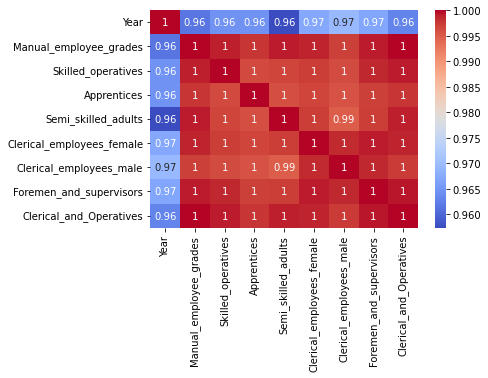

In [32]:
sns.heatmap(corr, annot=True, cmap='coolwarm');

<AxesSubplot:title={'center':'Manual_employee_grades Distribution'}>

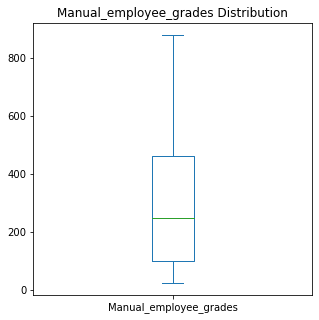

In [33]:
df['Manual_employee_grades'].plot(kind='box', title='Manual_employee_grades Distribution', figsize=(5,5))

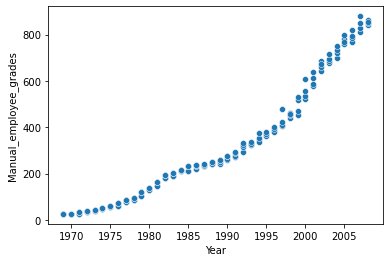

In [34]:
sns.scatterplot(x='Year', y='Manual_employee_grades', data=df)
plt.show()

In [35]:
df.head(20)

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,1969,Q1,26.00,25.24,12.63,21.34,14.01,22.33,35.40,25.56
1,1969,Q2,26.00,27.59,12.63,23.41,14.01,22.33,35.40,25.56
2,1969,Q3,26.00,30.77,12.63,24.71,14.01,22.33,35.40,25.56
3,1969,Q4,26.00,29.48,12.63,23.20,14.01,22.33,35.40,25.56
4,1970,Q1,26.00,29.97,12.63,24.19,14.01,22.33,35.40,25.56
5,1970,Q2,26.00,30.74,12.63,25.39,14.01,22.33,35.40,25.56
6,1970,Q3,27.50,31.90,12.60,26.55,15.30,25.32,36.39,27.05
7,1970,Q4,27.50,32.42,12.60,26.13,15.30,25.32,36.39,27.05
8,1971,Q1,27.50,36.45,12.60,30.47,15.30,25.32,36.39,27.05
9,1971,Q2,27.50,36.28,12.60,30.30,15.30,25.32,36.39,27.05


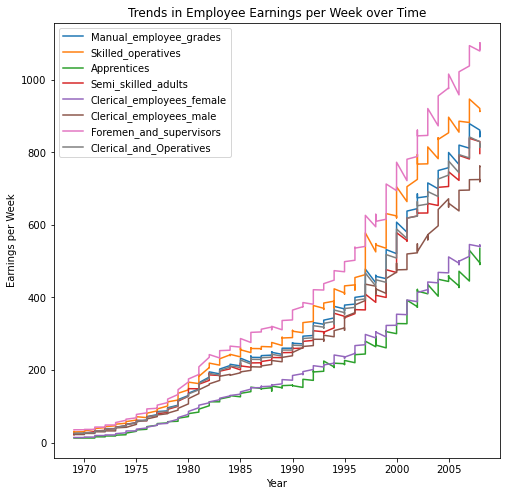

In [36]:
df.plot(x='Year', y=['Manual_employee_grades', 'Skilled_operatives', 'Apprentices', 'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male', 'Foremen_and_supervisors', 'Clerical_and_Operatives'],figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Earnings per Week')
plt.title('Trends in Employee Earnings per Week over Time')
plt.show()


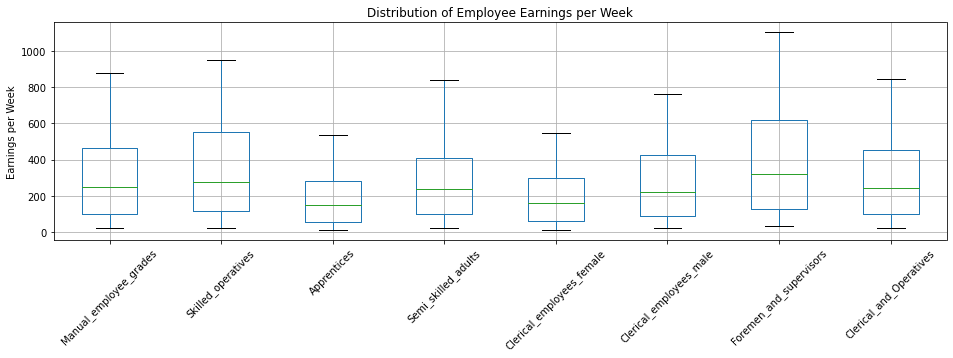

In [37]:
df.boxplot(column=['Manual_employee_grades', 'Skilled_operatives', 'Apprentices', 'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male', 'Foremen_and_supervisors', 'Clerical_and_Operatives'], figsize=(16,4), rot=45)
plt.ylabel('Earnings per Week')
plt.title('Distribution of Employee Earnings per Week')
plt.show()

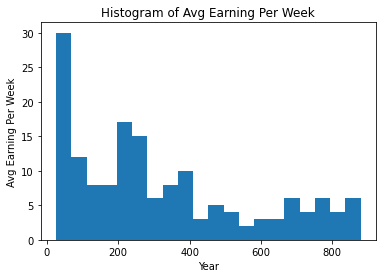

In [38]:
plt.hist(df['Manual_employee_grades'], bins=20)
plt.xlabel('Year')
plt.ylabel('Avg Earning Per Week')
plt.title('Histogram of Avg Earning Per Week')
plt.show()

In [39]:
#sns.pairplot(df)
#plt.show()

In [40]:
df1=df.drop(["Quarter"], axis=1)
log_df1 = np.log(df1)
log_df1.head()

,Year,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,7.585281,3.258097,3.228430,2.536075,3.060583,2.639771,3.105931,3.566712,3.241029
1,7.585281,3.258097,3.317453,2.536075,3.153163,2.639771,3.105931,3.566712,3.241029
2,7.585281,3.258097,3.426540,2.536075,3.207208,2.639771,3.105931,3.566712,3.241029
3,7.585281,3.258097,3.383712,2.536075,3.144152,2.639771,3.105931,3.566712,3.241029
4,7.585789,3.258097,3.400197,2.536075,3.185939,2.639771,3.105931,3.566712,3.241029


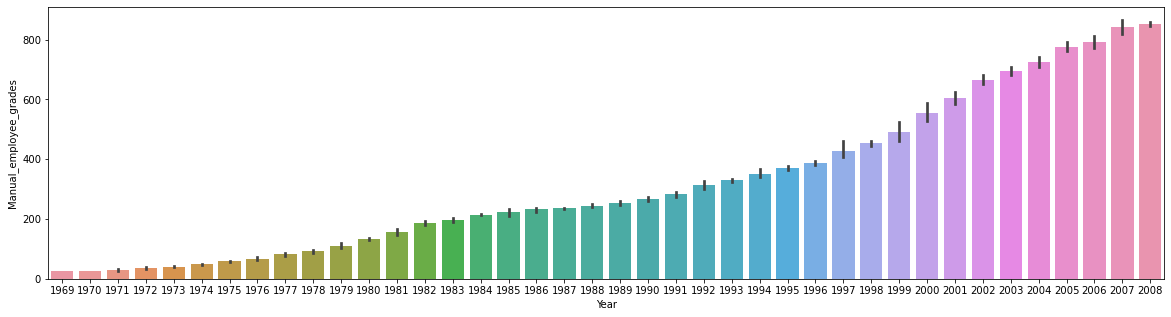

In [41]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Manual_employee_grades", data=df)

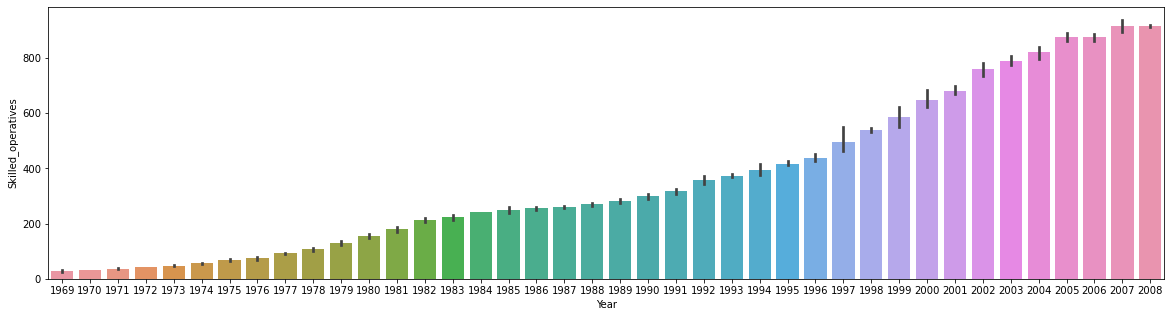

In [42]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Skilled_operatives", data=df)

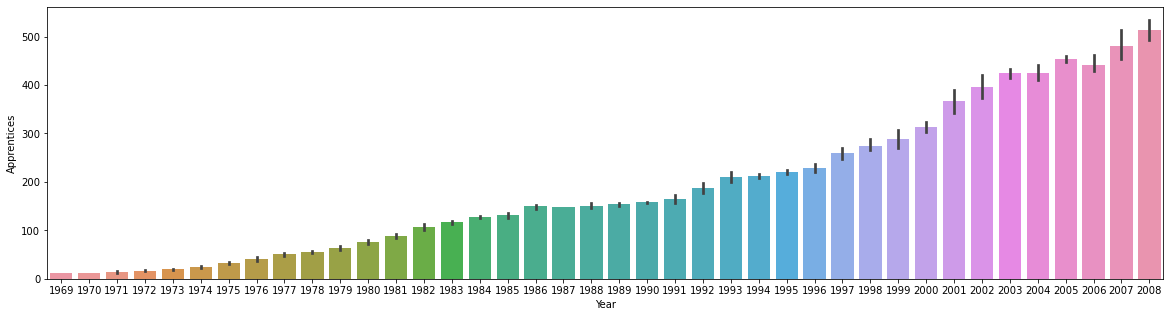

In [43]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Apprentices", data=df)

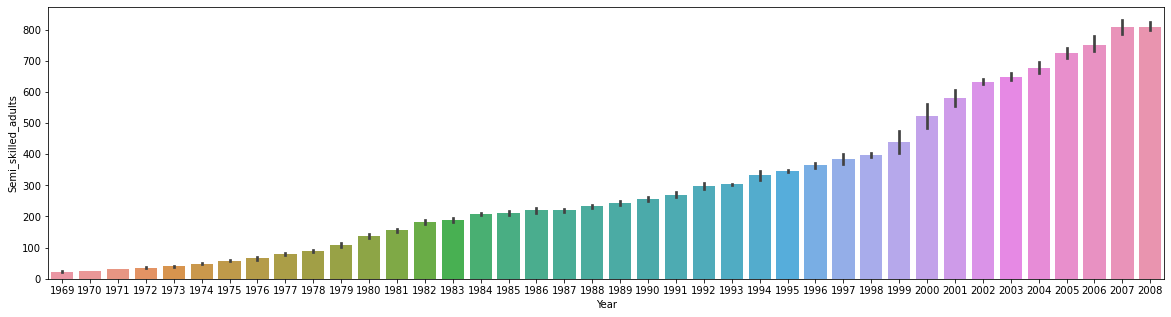

In [44]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Semi_skilled_adults", data=df)

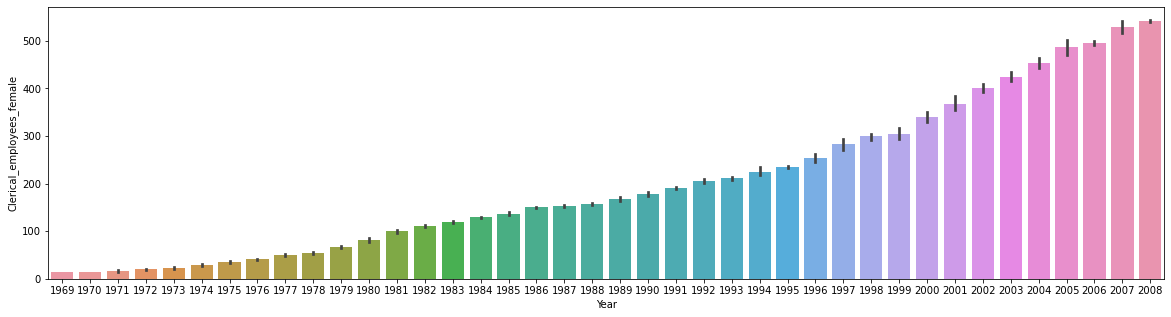

In [45]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Clerical_employees_female", data=df)

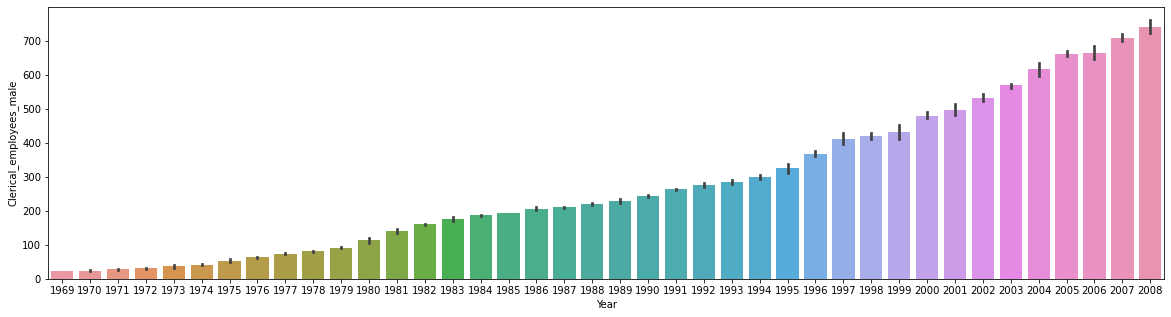

In [46]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Clerical_employees_male", data=df)

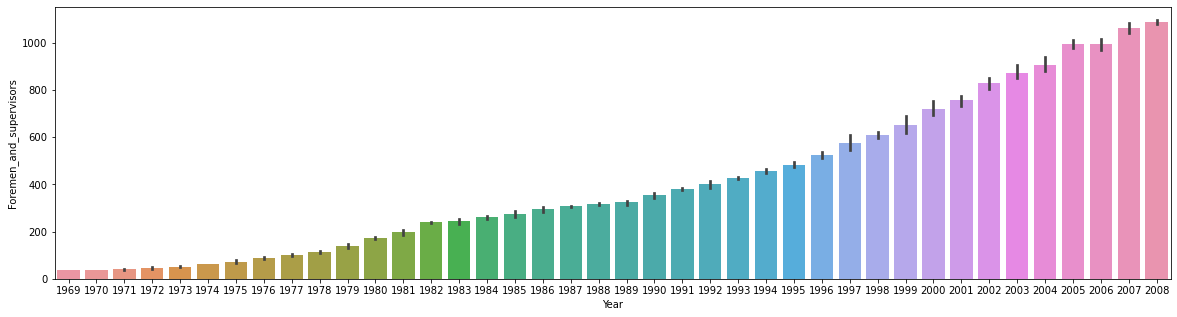

In [47]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Foremen_and_supervisors", data=df)

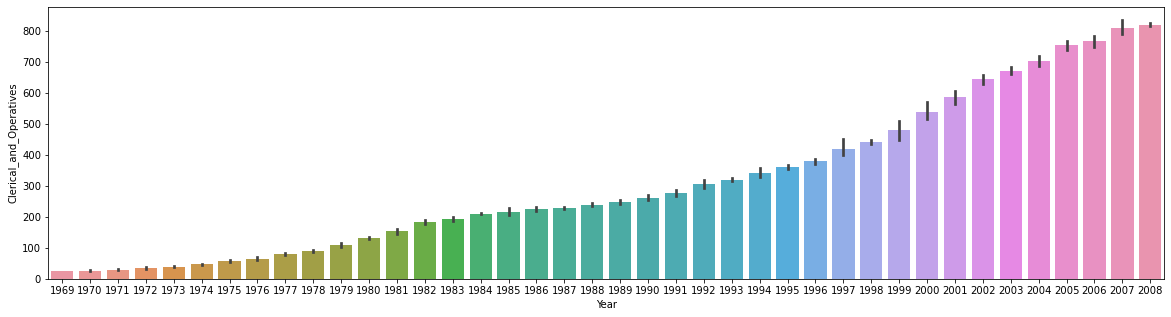

In [48]:
plt.figure(figsize=(20,5))
ax = sns.barplot(x="Year", y="Clerical_and_Operatives", data=df)

## Inferential statistics ##

In [49]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,1969,Q1,26.0,25.24,12.63,21.34,14.01,22.33,35.4,25.56
1,1969,Q2,26.0,27.59,12.63,23.41,14.01,22.33,35.4,25.56
2,1969,Q3,26.0,30.77,12.63,24.71,14.01,22.33,35.4,25.56
3,1969,Q4,26.0,29.48,12.63,23.20,14.01,22.33,35.4,25.56
4,1970,Q1,26.0,29.97,12.63,24.19,14.01,22.33,35.4,25.56


In [50]:
import scipy.stats as stats
from statsmodels.stats import weightstats

## 1. T-Test One Population - Employer type Apprentices Earnings per week.

In [51]:
df["Apprentices"].mean()

190.2465625

In [52]:
X= df["Apprentices"];X

0       12.63
1       12.63
2       12.63
3       12.63
4       12.63
        ...  
155    529.94
156    495.34
157    490.82
158    531.14
159    535.35
Name: Apprentices, Length: 160, dtype: float64

In [53]:
#H0 : u = 190
#H1 : u =! 190
stats.ttest_1samp(X,190)

Ttest_1sampResult(statistic=0.020919302333901407, pvalue=0.9833362578998361)

In [54]:
##  statistic=0.020919302333901407 is the t value = 0.02

In [55]:
##  if p-value < 0.05  we reject Ho
## if p-value > 0.05 we accept tht Ho 
## the p- vlaue is 0.983 is greater than 0.05 so we accept Ho

In [56]:
## We accept H0 ---> We reject H1, so there is enough evidence to say that the average Earnings per week of a Apprentices is 190 Euros weekly.

## 2. T-Test - two populations Weekly earning of female employees in Q1 and Q4 

In [57]:
df1=df[['Quarter','Clerical_employees_female']]

In [58]:
df1.head()

,Quarter,Clerical_employees_female
0,Q1,14.01
1,Q2,14.01
2,Q3,14.01
3,Q4,14.01
4,Q1,14.01


In [59]:
#We group the data according to the categories requested.
Q1 = df1.query('Quarter == "Q1"')['Clerical_employees_female']
Q4 = df1.query('Quarter == "Q4"')['Clerical_employees_female']

In [60]:
#We perform the test assuming as H0 that mu1 = mu2 (Q1 Earnings = Q4 Earnings)
test = stats.ttest_ind(Q1, Q4, equal_var=True)
display(test)

Ttest_indResult(statistic=-0.3238516637727038, pvalue=0.7469171142226096)

In [61]:
## p-value 0.74 is > alpha 0.05 so we accept the H0

## 3. Confidence Intervel 

In [62]:
import scipy.stats as st

In [63]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,1969,Q1,26.0,25.24,12.63,21.34,14.01,22.33,35.4,25.56
1,1969,Q2,26.0,27.59,12.63,23.41,14.01,22.33,35.4,25.56
2,1969,Q3,26.0,30.77,12.63,24.71,14.01,22.33,35.4,25.56
3,1969,Q4,26.0,29.48,12.63,23.20,14.01,22.33,35.4,25.56
4,1970,Q1,26.0,29.97,12.63,24.19,14.01,22.33,35.4,25.56


In [64]:
df["Clerical_employees_female"].describe()

count    160.000000
mean     202.449000
std      158.338201
min       14.010000
25%       62.467500
50%      160.850000
75%      299.955000
max      545.940000
Name: Clerical_employees_female, dtype: float64

In [65]:
#DEFINE THE VARIABLE WE FIND THE CONFIDENCE INTERVEL OF WEEKLY EARNINGS OF CLERICAL EMPLOYEES FEMALE
X = df.iloc[:, 6:7].values

In [66]:
#CENTRAL TENDENCY FOR THE AGE
mean = X.mean()
print("The mean is ", mean)

The mean is  202.449


In [67]:
#create 90% confidence interval for population mean of female employees Earnnigs per week
st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)) 

(array([177.72652298]), array([227.17147702]))

In [68]:
## The population average weekly earnings of clerical employees female is between 178 and 228.

## 4. ANOVA_oneway 

In [69]:
import pandas as pd 
from pandas import MultiIndex, Int16Dtype
#!pip install xgboost
import xgboost as xgb

In [70]:
import statistics as stats

In [71]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [72]:
##IMPORTING LIBRARIES
#import statsmodels.api as sm
#from statsmodels.formula.api import ols
#from scipy import stats
#import scipy as scipy

<Figure size 432x288 with 0 Axes>

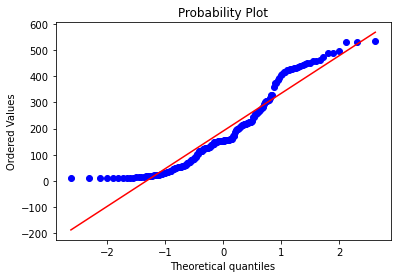

<Figure size 432x288 with 0 Axes>

In [73]:
#Normality plot. Our variable is "Apprentices"
stats.probplot(df.Apprentices, plot=plt)
plt.figure()

In [74]:
## Shapiro wilk test
## H0 : Apprentices employee earnings per week is normally distributed.
## H1 : Apprentices employee earnings per week is not normally distributed.

In [75]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q1"])

ShapiroResult(statistic=0.9094510078430176, pvalue=0.0036433618515729904)

In [76]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [77]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q2"])

ShapiroResult(statistic=0.9064576625823975, pvalue=0.0029626237228512764)

In [78]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [79]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q3"])

ShapiroResult(statistic=0.9077562093734741, pvalue=0.0032397767063230276)

In [80]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [81]:
#Shapiro wilk test
stats.shapiro(df.Apprentices[df.Quarter == "Q4"])

ShapiroResult(statistic=0.9047659039497375, pvalue=0.002638579113408923)

In [82]:
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

In [83]:
df['Quarter'].value_counts()

Quarter
Q1    40
Q2    40
Q3    40
Q4    40
Name: count, dtype: int64

In [84]:
Q1 = df.Apprentices[df.Quarter == "Q1"]

In [85]:
Q2 = df.Apprentices[df.Quarter == "Q2"]

In [86]:
Q3 = df.Apprentices[df.Quarter == "Q3"]

In [87]:
Q4 = df.Apprentices[df.Quarter == "Q4"]

In [88]:
sd1 = Q1.std()
sd1

142.968398272315

In [89]:
sd2 = Q2.std()
sd2

147.0864759283655

In [90]:
sd3 = Q3.std()
sd3

152.63124818349382

In [91]:
sd4 = Q4.std()
sd4

158.2795302467385

In [92]:
# check the homogeneity of the variances between the variables.

#Homogeinity of variance: Levene's test.

# H0 : Variance between the Quarterly earnings are equal
# H1 : Variance between the Quarterly earnings are not equal

from scipy.stats import levene

In [93]:
levene(Q1, Q2, Q3, center = 'mean')

LeveneResult(statistic=0.09983931243207328, pvalue=0.9050598420875583)

In [94]:
## pvalue=0.9050 > alpha(0.05) we accept the H0

In [107]:
import statsmodels.api as sm

In [108]:
from statsmodels.formula.api import ols

In [109]:
#ONE-WAY ANOVA

# H0 : mu(Q1)=mu(Q2)=mu(Q3)=mu(Q4)
# H1 : At least 2 mu's are different

model = ols('Apprentices~Quarter', data = df).fit()
aov = sm.stats.anova_lm(model, type=2)
print(aov)

             df        sum_sq       mean_sq         F    PR(>F)
Quarter     3.0  7.582177e+03   2527.392341  0.111803  0.953098
Residual  156.0  3.526501e+06  22605.775481       NaN       NaN


In [ ]:
## degrees of freedom is (n-1) = 4-1 =3
## F = 0.111 abs
## Pvalue = 0.95
## As Pvalue is > alpha(0.05) we accept the H0, means the variance are equal in each Quater earnings. or we don't have reason to 
## belive that there are significant differences between the earnings per quater.


## 4. ANOVA_Two way 

In [110]:
df['Quarter'].value_counts()

Quarter
Q1    40
Q2    40
Q3    40
Q4    40
Name: count, dtype: int64

In [111]:
df['Clerical_employees_male'].value_counts()

Clerical_employees_male
22.33     6
29.84     4
32.28     4
25.32     4
182.88    2
         ..
273.95    1
273.16    1
267.32    1
264.91    1
760.96    1
Name: count, Length: 119, dtype: int64

In [112]:
model2 = ols('Apprentices~Clerical_employees_male+Quarter', data = df).fit()
aov2 = sm.stats.anova_lm(model2, type=2)
print(aov2)

                            df        sum_sq       mean_sq             F   
Quarter                    3.0  7.582177e+03  2.527392e+03     13.652730  \
Clerical_employees_male    1.0  3.497807e+06  3.497807e+06  18894.819301   
Residual                 155.0  2.869359e+04  1.851199e+02           NaN   

                                PR(>F)  
Quarter                   5.990245e-08  
Clerical_employees_male  7.361902e-164  
Residual                           NaN  


## Non-Parametric Tests ## Need to split the notebook from here.

## 1. Sign Test

In [ ]:
## Apply the sign test to compare the median earnings per week between the years 1990 and 2008.

In [ ]:
## H0 : The median earnings per week in the construction industry are the same for the years 1990 and 2008.
## H1 : The median earnings per week in the construction industry are different for the years 1990 and 2008.

In [113]:
# subset the data for years 1990 and 2008
df_subset = df[df["Year"].isin([1990, 2008])]
df_subset

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
84,1990,Q1,260.11,289.40,158.16,248.40,171.94,239.32,338.12,254.96
85,1990,Q2,261.25,290.58,156.85,250.81,175.41,241.19,348.00,256.18
86,1990,Q3,275.29,309.35,158.32,262.66,181.74,245.19,364.55,269.81
87,1990,Q4,273.82,307.02,157.00,259.46,184.91,248.28,365.14,268.51
156,2008,Q1,861.20,920.77,495.34,829.71,540.39,724.98,1079.12,829.22
157,2008,Q2,842.95,912.50,490.82,803.92,544.70,719.01,1086.62,813.88
158,2008,Q3,848.49,919.12,531.14,799.90,543.50,762.07,1102.07,820.59
159,2008,Q4,855.54,913.07,535.35,796.63,540.13,760.96,1083.12,822.31


In [114]:
# calculate the difference in earnings between the years 1969 and 1972
diff = df_subset.loc[df_subset["Year"] == 1990,"Manual_employee_grades"].iloc[0] - \
       df_subset.loc[df_subset["Year"] == 2008,"Manual_employee_grades"].iloc[0]
diff

-601.09

In [115]:
# create a new column to indicate whether the difference is positive, negative, or zero
df_subset["diff_sign"] = df_subset["Manual_employee_grades"].apply(lambda x: "+" if x > diff else "-" if x < diff else "0")

In [116]:
df_subset["diff_sign"]

84     +
85     +
86     +
87     +
156    +
157    +
158    +
159    +
Name: diff_sign, dtype: object

In [117]:
# count the number of positive and negative differences
counts = df_subset["diff_sign"].value_counts()
counts

diff_sign
+    8
Name: count, dtype: int64

In [118]:
from scipy import stats

In [119]:
# calculate the p-value
p_value = stats.binom_test(counts, n=counts.sum(), p=0.5)

In [120]:
print(f"Test statistic: {counts}")
print(f"P-value: {p_value}")


Test statistic: diff_sign
+    8
Name: count, dtype: int64
P-value: 0.0078125


In [121]:
## Accroding to the pvalue 0.0078 < alpha(0.05) we reject the H0, 
## means there is no evidence to say that the employee earnings per week is same in year 1990 and 2008.

## 2. Kruskal-Wallis H test

In [122]:
from scipy.stats import kruskal

In [123]:
## H0: there is no difference in weekly earnings in Quater1 to Q4
## H1: there is at least one of the Quarterly earnings has differences 

In [124]:
df.head()

,Year,Quarter,Manual_employee_grades,Skilled_operatives,Apprentices,Semi_skilled_adults,Clerical_employees_female,Clerical_employees_male,Foremen_and_supervisors,Clerical_and_Operatives
0,1969,Q1,26.0,25.24,12.63,21.34,14.01,22.33,35.4,25.56
1,1969,Q2,26.0,27.59,12.63,23.41,14.01,22.33,35.4,25.56
2,1969,Q3,26.0,30.77,12.63,24.71,14.01,22.33,35.4,25.56
3,1969,Q4,26.0,29.48,12.63,23.20,14.01,22.33,35.4,25.56
4,1970,Q1,26.0,29.97,12.63,24.19,14.01,22.33,35.4,25.56


In [125]:
df_subset1 = df[["Quarter","Skilled_operatives"]]
df_subset1.head()

,Quarter,Skilled_operatives
0,Q1,25.24
1,Q2,27.59
2,Q3,30.77
3,Q4,29.48
4,Q1,29.97


In [126]:
##df.to_csv("df_subset1", index=False)

In [127]:
# group the data by quarter
q1 = df.loc[df['Quarter'] == 'Q1']['Skilled_operatives']
q2 = df.loc[df['Quarter'] == 'Q2']['Skilled_operatives']
q3 = df.loc[df['Quarter'] == 'Q3']['Skilled_operatives']
q4 = df.loc[df['Quarter'] == 'Q4']['Skilled_operatives']


In [128]:
# perform the Kruskal-Wallis H test
stat, p_value = kruskal(q1, q2, q3, q4)

In [129]:
# display the results
print('Kruskal-Wallis H Test Results:')
print('Test Statistic: {:.4f}'.format(stat))
print('p-value: {:.4f}'.format(p_value))

Kruskal-Wallis H Test Results:
Test Statistic: 0.2241
p-value: 0.9736


In [130]:
if p_value < 0.05:
    print('There is a significant difference between the quarters.')
else:
    print('There is no significant difference between the quarters.')

There is no significant difference between the quarters.


In [131]:
## According to the results Pvalue 0.97 is > alpha(0.05) so we accept the H0,
## means There is no significant difference between the Skilled_operatives weely earnings in quarters 

## 3. U-Mann Whitman test

In [132]:
df2=df[['Clerical_employees_female','Clerical_employees_male']]

In [133]:
df2.head()

,Clerical_employees_female,Clerical_employees_male
0,14.01,22.33
1,14.01,22.33
2,14.01,22.33
3,14.01,22.33
4,14.01,22.33


In [134]:
## H0: There is no difference in the weekly earnings of Clerical_employees_female and Clerical_employees_male
## H1: There is a difference in the weekly earnings of Clerical_employees_female and Clerical_employees_male

In [135]:
from scipy.stats import mannwhitneyu

In [136]:
mannwhitneyu(df2['Clerical_employees_female'], df2['Clerical_employees_male'])

MannwhitneyuResult(statistic=10156.0, pvalue=0.001400663527846542)

In [137]:
## according to the results pvalue 0.001 is < alpha(0.05) so we reject the H0,
## means there is no evidence to say that no significance difference in the weekly earnings of Clerical_employees_female and Clerical_employees_male